# chap 16 이미지 인식, CNN

In [6]:
# %load deep_import.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# mnist datasets 를 load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train 의 shape 확인
print(x_train.shape)

(60000, 28, 28)


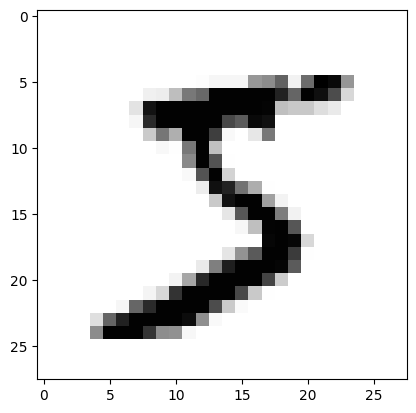

In [10]:
# x_train[0] -> 자료 확인
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [15]:
for x in x_train[0]:
    for i in x:
        print("{:3d}".format(i), end='')
    print()
    
# 데이터를 정규화
x_train.dtype

# 0 ~ 255 사이의 수를 0 ~ 1 사이의 수로 정규화
# 1. 데이터타입을 float 형으로 변경
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print(np.unique(y_train))  # 타겟 (클래스가 10개 확인)

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [18]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1384576   
                                                      

In [19]:
# 모델의 실행 옵션 설정
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 설정
modelpath='./data/data/model/mnist_cnn.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True, verbose=0)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습 실행
history= model.fit(x_train, y_train, validation_split=0.25, epochs=1000, batch_size=200, verbose=0, callbacks=[early_stopping, checkpointer])

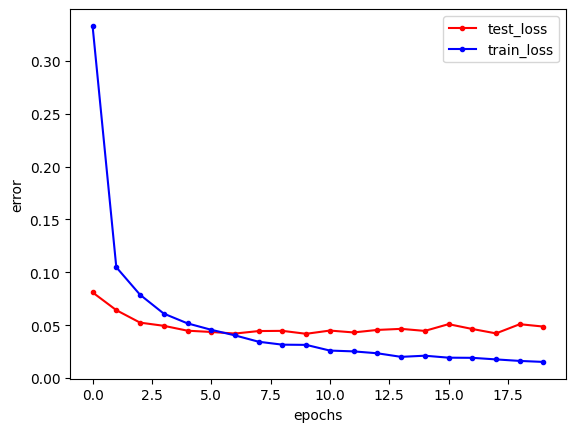

In [21]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('error')

plt.show()

In [22]:
# 학습 정확도, 검증 정확도, 테스트 정확도 출력
print("학습 정확도 : ", history.history['accuracy'][-1])
print("검증 정확도 : ", history.history['val_accuracy'][-1])
print("테스트 정확도 : ", model.evaluate(x_test, y_test)[1])

학습 정확도 :  0.9949555397033691
검증 정확도 :  0.9886000156402588
313/313 [==============================] - 4s 12ms/step - loss: 0.0343 - accuracy: 0.9911
테스트 정확도 :  0.991100013256073
